# **WEIGHT INITIALIZATION**

---
---

## **HAND WRITTEN DIGIT PREDICTION**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Load Data**

In [2]:
mnist = tf.keras.datasets.mnist

**Split Data - Training, Validation and Test**

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Scaling the dataset by/255.

X_train, X_valid = X_train_full[5000:]/255., X_train_full[:5000]/255.
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

X_test = X_test/255.

11490434/11490434 [==============================] - 0s 0us/step


**Build Model**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras import regularizers

from tensorflow.keras.initializers import HeNormal

In [5]:
model = Sequential()

# Input Layer
model.add(Flatten(input_shape = [28, 28]))

# Hidden Layer
model.add(Dense(64, activation = "relu", kernel_initializer = HeNormal(seed = None)))
model.add(Dropout(0.2))

model.add(Dense(32, activation = "relu", kernel_initializer = HeNormal(seed = None)))
model.add(Dropout(0.2))


model.add(Dense(16, activation = "relu", kernel_initializer = HeNormal(seed = None)))
model.add(Dropout(0.2))

model.add(Dense(10, activation = "softmax"))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

In [9]:

sgd = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)

model.compile(loss = "sparse_categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])

**Training**

In [10]:
model.fit(X_train, y_train, epochs = 5, validation_data = [X_valid, y_valid], batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6835 - accuracy: 0.7863 - val_loss: 0.2238 - val_accuracy: 0.9390
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3845 - accuracy: 0.8920 - val_loss: 0.2011 - val_accuracy: 0.9456
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3178 - accuracy: 0.9128 - val_loss: 0.1552 - val_accuracy: 0.9580
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2857 - accuracy: 0.9227 - val_loss: 0.1466 - val_accuracy: 0.9620
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9288 - val_loss: 0.1485 - val_accuracy: 0.9606


In [13]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.683509,0.786345,0.223804,0.9390
1,0.384507,0.892036,0.201122,0.9456
2,0.317774,0.912836,0.155245,0.9580
3,0.285667,0.922691,0.146584,0.9620
4,0.258348,0.928764,0.148501,0.9606


<Axes: >

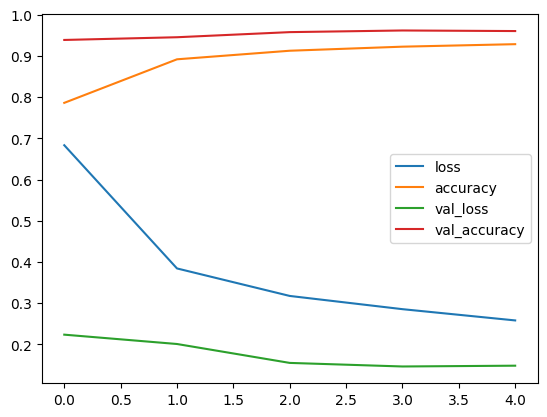

In [12]:
pd.DataFrame(model.history.history).plot()